In [1]:
#keras imports
#other imports
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from PIL import ImageFilter
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def float_or_na(value):
    return float(value if value != 'na' else 0)

def process_data(filename,inlcude_target=False):
    with open(filename) as f:
        data = json.load(f)
    X_ids = []
    X_band1 = np.zeros((len(data), img_rows*img_cols))
    X_band2 = np.zeros((len(data), img_rows*img_cols))
    X_angle = np.zeros((len(data),3))
    y = None
    if(inlcude_target):
        y = np.zeros(len(data))
    for i in range(len(data)):
        el = data[i]
        X_ids.append(el['id'])
        X_band1[i] = np.array(el['band_1'])
        X_band2[i] = np.array(el['band_2'])
        angle = float_or_na(el['inc_angle'])
        X_angle[i][0] = angle
        X_angle[i][1] = np.sin(angle)
        X_angle[i][2] = np.cos(angle)
        if(inlcude_target):
            y[i] = np.int(el['is_iceberg'])
    del data
    return X_ids, X_band1, X_band2, X_angle, y

In [3]:
img_rows, img_cols = 75, 75
input_shape = (img_rows, img_cols, 1)
trainfile = 'train.json'
testfile = 'test.json'
model_weights = 'model_wights.hdf5'

In [4]:
_, X_band1, X_band2, X_angle, y = process_data(trainfile,inlcude_target = True)

In [5]:
scaler = MinMaxScaler()
X_band1 = scaler.fit_transform(X_band1)

In [6]:
X_band1 = X_band1.reshape(X_band1.shape[0], img_rows, img_cols)
X_band2 = X_band2.reshape(X_band2.shape[0], img_rows, img_cols)

0.0


Text(0.5,1.05,'Band 2')

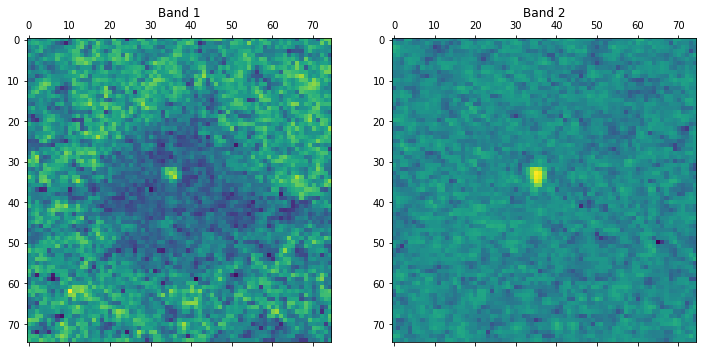

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
i = 4
print(y[i])
ax1.matshow(X_band1[i])
ax1.set_title('Band 1')
ax2.matshow(X_band2[i])
ax2.set_title('Band 2')

In [27]:
f,axarr = plt.subplots(2,3,figsize=(20,10))
iarray = []
for i in range(6):
    arr = np.asarray(X_band1[i])
    img = Image.fromarray(arr*255)
    img = img.convert('L')
    img = img.filter(ImageFilter.SMOOTH_MORE)
    iarray.append(img)   
axarr[0][0].imshow(iarray[0])
axarr[0][1].imshow(iarray[1])
axarr[0][2].imshow(iarray[2])
axarr[1][0].imshow(iarray[3])
axarr[1][1].imshow(iarray[4])
axarr[1][2].imshow(iarray[5])
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'mask'